# Import modules

In [34]:
# geo-data handling
import xarray as xr

# standard numerical package
import numpy as np
import matplotlib.pyplot as plt

#from auxiliary script sin this folder
import geo_tools

import warnings
warnings.filterwarnings('ignore')

# Load Temperature data

In [35]:
T_cnt_files = ['b.e21.BSSP585cmip6.f09_g17.control.01.cam.h0.TREFHT.201501-206412.nc',
               'b.e21.BSSP585cmip6.f09_g17.control.01.cam.h0.TREFHT.206501-209912.nc',
               'b.e21.BSSP585cmip6.f09_g17.control.06.cam.h0.TREFHT.210001-213012.nc']

# due to an error that occured during the simulation, the years 2045-2050 are faulty in the first run.
# one has to manually crop them
T_sai2020_files = ['b.e21.BSSP585cmip6.f09_g17.2020feedback.01.cam.h0.TREFHT.202001-202912.nc',
                'b.e21.BSSP585cmip6.f09_g17.2020feedback.01.cam.h0.TREFHT.203001-203912.nc',
                'b.e21.BSSP585cmip6.f09_g17.2020feedback.01.cam.h0.TREFHT.204001-204912.nc',
                'b.e21.BSSP585cmip6.f09_g17.2020feedback.02.cam.h0.TREFHT.204501-209412.nc',
                'b.e21.BSSP585cmip6.f09_g17.2020feedback.02.cam.h0.TREFHT.209501-209912.nc',
                'b.e21.BSSP585cmip6.f09_g17.2020feedback.02_ext02.cam.h0.TREFHT.210001-213012.nc']

T_sai2080_files = ['b.e21.BSSP585cmip6.f09_g17.feedback.09.cam.h0.TREFHT.208001-209912.nc',
                   'b.e21.BSSP585cmip6.f09_g17.2080feedback_ext01.cam.h0.TREFHT.210001-213012.nc']  

files = {
    'Control': T_cnt_files,
    'SAI 2020': T_sai2020_files,
    'SAI 2080J': T_sai2080_files
}

In [36]:
# save the temperature data in dictionaries indexed by the scenario name
scenarios = ['Control', 'SAI 2020', 'SAI 2080J']
T1 = {}

for scenario in scenarios:
    # collect all partial datasets
    da_container = []
    for file_name in files[scenario]:
        path = f"./data/{scenario}/{file_name}"
        # handle the special case of SAI2020
        if (scenario == 'SAI 2020') and (file_name == T_sai2020_files[2]):
            da_container.append(xr.open_dataset(path).TREFHT.sel(time=slice('2040','2044')))
        else:
            da_container.append(xr.open_dataset(path).TREFHT)
    # concatenate the dataset
    T1[scenario] = xr.concat(da_container,dim='time')

In [37]:
# without land mask
T = {'Control': T1['Control'].sel(time = slice('2015', '2130')) - 273.15,
     'SAI 2020': T1['SAI 2020'].sel(time = slice('2020', '2130')) - 273.15,
     'SAI 2080J': xr.concat((T1['Control'].sel(time = slice('2020', '2079')), T1['SAI 2080J'].sel(time = slice('2080', '2130'))), dim = 'time') - 273.15}

# And now we compute global mean surface temperature...

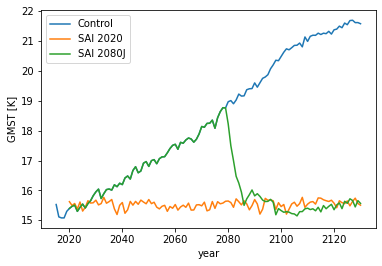

In [38]:
#for name in ['Control','SAI 2020']:
%matplotlib inline
for name in ['Control','SAI 2020','SAI 2080J']:
    geo_tools.global_mean(T[name])\
        .plot(label=name)

plt.ylabel('GMST [K]')
plt.legend()